<a href="https://colab.research.google.com/github/sbarkerclarke-phd/TDAHistopathology/blob/main/R_plotpersistence_cubical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("ripserr")
install.packages("googledrive")
install.packages('TDAstats')
library(devtools)
devtools::install_github("paultpearson/TDAmapper")
)
install.packages("R.utils")


In [ ]:
library(googledrive)
# authorize google drive
# Check if is running in Colab and redefine is_interactive()
if (file.exists("/usr/local/lib/python3.6/dist-packages/google/colab/_ipython.py")) {
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}


In [ ]:
install.packages("httpuv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘promises’, ‘later’




In [ ]:
drive_auth(use_oob = TRUE, cache = TRUE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/auth?client_id=603366585132-dpeg5tt0et3go5of2374d83ifevk5086.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code: 4/1AX4XfWiSNuACOnWYq_0ffmoWL0EU2Eoted7E3Ibpo8GvS8qBouk-3QL2Uho


In [ ]:
image = drive_get("hello.png")



! Problem with 1 path: no files found by this name

  hello.png

! No path resolved to exactly 1 file.



name,path,id,drive_resource
<chr>,<chr>,<drv_id>,<list>


In [ ]:
library(ripserr)
library(TDAstats)
library(ggplot2)
library(TDAmapper)
library(magrittr)
library(R.utils)
library(httr)

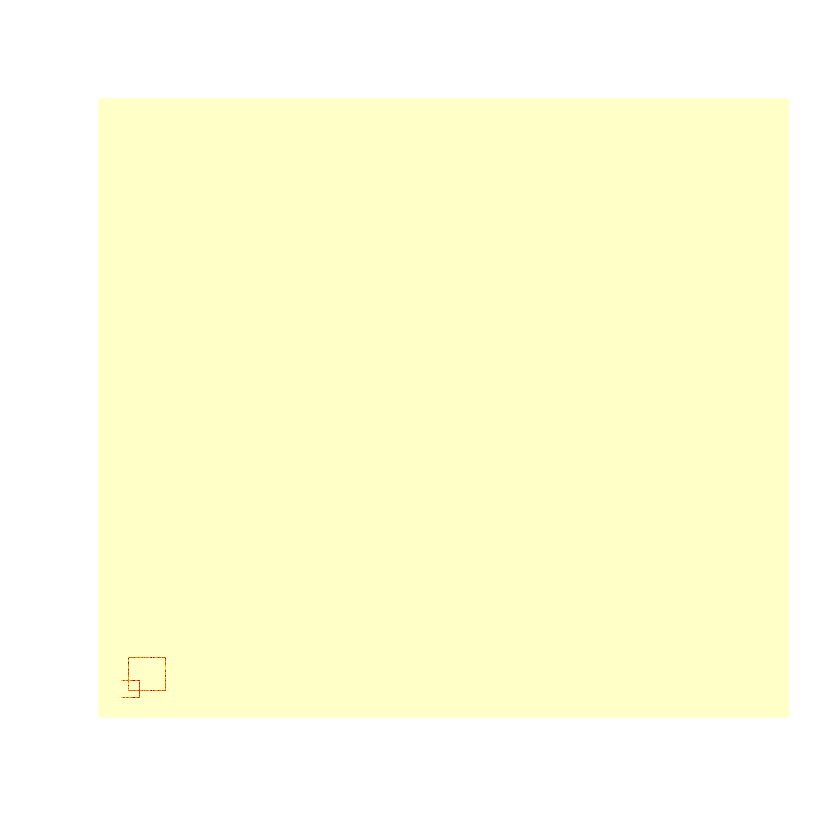

In [ ]:
# create dataset
sample_image <- matrix(0, nrow = 1000, ncol = 1000)
i <- 44:98
j <- c(44,98)
ii <- 33:60
jj <- c(33,60)
sample_image[i, j] <- rnorm(length(i),0.5)+3
sample_image[j, i] <- rnorm(length(i),0.5)+3
sample_image[ii, jj] <- rnorm(length(ii),1)+3
sample_image[jj, ii] <- rnorm(length(ii),1)+3


# view as image
graphics::image(sample_image, useRaster = TRUE, axes = FALSE)

In [ ]:
# calculate persistent homology
image_phom <- cubical(sample_image) %>% dplyr::filter(dimension!=-1)
# plot diagram
plot_barcode(as.matrix(image_phom))


In [ ]:
#Image data